In [1]:
# the cnn module provides classes for training/predicting with various types of CNNs
from opensoundscape.torch.models.cnn import CNN

#other utilities and packages
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
import random
import subprocess

#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import csv

# Define the directory containing the sound files
directory = "./training_recording"
"""change code to add subsections for absence and presence"""
absence_dir = os.path.join(directory, "Absence")
presence_dir = os.path.join(directory, "Presence")


# Create an empty list to hold the data
data = []

'''loop over all files in absence'''

for filename in os.listdir(absence_dir):
    if filename.endswith(".wav") or filename.endswith(".WAV"):
        # Extract the sound type from the filename
        bird = "absent"
        sound_type = "na"

        # Create a dictionary for the sound file
        sound = {"filename": os.path.join(absence_dir, filename), "NorthernBobwhite": bird, "sound_type": sound_type}

        # Append the sound dictionary to the data list
        data.append(sound)

"""loops over presence"""

for filename in os.listdir(presence_dir):
    if filename.endswith(".wav") or filename.endswith(".WAV"):
        # Extract the sound type from the filename
        bird = "present"
        sound_type = "song"

        # Create a dictionary for the sound file
        sound = {"filename": os.path.join(presence_dir, filename), "NorthernBobwhite": bird, "sound_type": sound_type}

        # Append the sound dictionary to the data list
        data.append(sound)

#Define the fieldnames for the CSV file
fieldnames = ["filename", "NorthernBobwhite", "sound_type"]

# Open a new CSV file in write mode
with open("bobwhite_data.csv", mode="w", newline='') as file:

    # Create a CSV writer object
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Write the header row to the CSV file
    writer.writeheader()

    # Write each dictionary to a row in the CSV file
    for row in data:
        writer.writerow(row)

In [3]:
import pandas as pd

bobwhite_data = pd.read_csv('bobwhite_data.csv')

# create a new dataframe with the filenames from the previous table as the index
labels = pd.DataFrame(index=bobwhite_data['filename'])

#convert 'present' to 1 and 'absent' to 0
labels['NorthernBobwhite']=[1 if l=='present' else 0 for l in bobwhite_data['NorthernBobwhite']]

#look at the first rows
labels.head(3)

,NorthernBobwhite
filename,
./training_recording\Absence\DiLane_TrainingClip_Absence (1).wav,0
./training_recording\Absence\DiLane_TrainingClip_Absence (10).wav,0
./training_recording\Absence\DiLane_TrainingClip_Absence (11).wav,0


In [4]:
from sklearn.model_selection import train_test_split
train_df,validation_df = train_test_split(labels,test_size=0.2,random_state=1)

In [5]:
from opensoundscape.torch.models.cnn import load_model
import os

# Define constants
SAMPLE_DURATION = 4.0
NUM_EPOCHS = 15
BATCH_SIZE = 10
SAVE_INTERVAL = 150

# Specify paths
model_path = './bird_training/bobwhite/best.model'
save_path = './bird_training/bobwhite'

# Create model object
classes = train_df.columns #in this case, there's just one class: ["woodcock"]

if os.path.exists(model_path):
    model = load_model(model_path)
else:
    model = CNN('resnet18', classes=classes, sample_duration=SAMPLE_DURATION)

model.train(
    train_df=train_df,
    validation_df=validation_df,
    save_path=save_path,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    save_interval=SAVE_INTERVAL,
    num_workers=0, #specify 4 if you have 4 CPU processes, eg; 0 means only the root process
)

model.save(model_path)
model = load_model(model_path)


Training Epoch 0
Epoch: 0 [batch 0/15, 0.00%] 
	DistLoss: 0.477
Metrics:
Epoch: 0 [batch 10/15, 66.67%] 
	DistLoss: 0.907
Metrics:
Metrics:
	MAP: 0.578

Validation.
Metrics:
	MAP: 0.601

Training Epoch 1
Epoch: 1 [batch 0/15, 0.00%] 
	DistLoss: 1.122
Metrics:
Epoch: 1 [batch 10/15, 66.67%] 
	DistLoss: 1.550
Metrics:
Metrics:
	MAP: 0.578

Validation.
Metrics:
	MAP: 0.691

Training Epoch 2
Epoch: 2 [batch 0/15, 0.00%] 
	DistLoss: 0.314
Metrics:
Epoch: 2 [batch 10/15, 66.67%] 
	DistLoss: 1.557
Metrics:
Metrics:
	MAP: 0.655

Validation.
Metrics:
	MAP: 0.891

Training Epoch 3
Epoch: 3 [batch 0/15, 0.00%] 
	DistLoss: 0.260
Metrics:
Epoch: 3 [batch 10/15, 66.67%] 
	DistLoss: 0.686
Metrics:
Metrics:
	MAP: 0.862

Validation.
Metrics:
	MAP: 0.913

Training Epoch 4
Epoch: 4 [batch 0/15, 0.00%] 
	DistLoss: 2.027
Metrics:
Epoch: 4 [batch 10/15, 66.67%] 
	DistLoss: 0.830
Metrics:
Metrics:
	MAP: 0.816

Validation.
Metrics:
	MAP: 0.723

Training Epoch 5
Epoch: 5 [batch 0/15, 0.00%] 
	DistLoss: 0.704


c:\Users\jonat\anaconda3\envs\opensoundscape2\lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


Text(0, 0.5, 'loss')

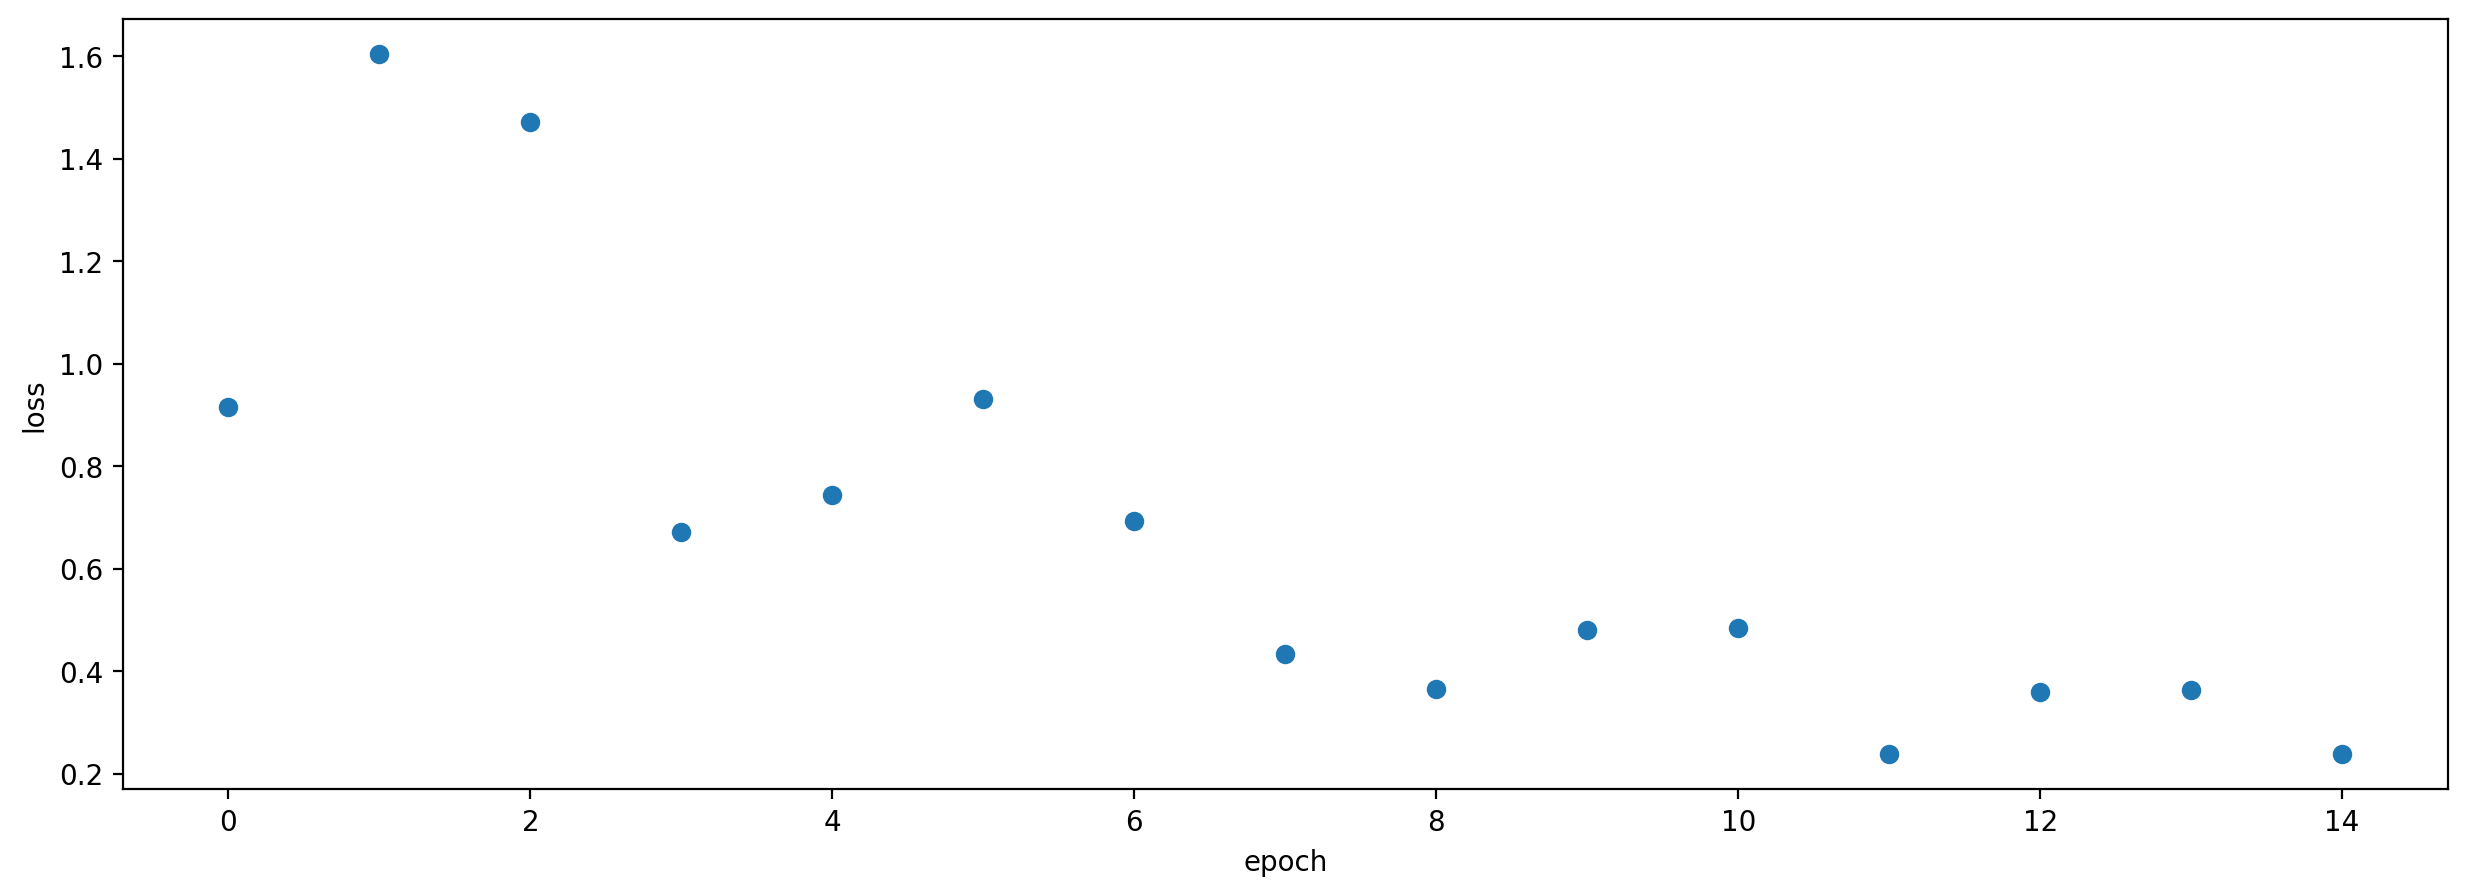

In [6]:
plt.scatter(model.loss_hist.keys(),model.loss_hist.values())
plt.xlabel('epoch')
plt.ylabel('loss')

In [38]:
from glob import glob

# Search for .wav and .WAV files in all subdirectories of the directory
forest_recordings = glob('./analysis_recording/2022Forest/**/*.[wW][aA][vV]', recursive=True)
grasslandfall_recordings = glob('./analysis_recording/2022GrasslandFall/**/*.[wW][aA][vV]', recursive=True)
grasslandsummer_recordings = glob('./analysis_recording/2022GrasslandSummer/**/*.[wW][aA][vV]', recursive=True)

everything_list = [forest_recordings, grasslandfall_recordings, grasslandsummer_recordings]

[[], ['./analysis_recording/2022GrasslandFall\\Chino\\008 (field 5)\\20221021_060000.WAV', './analysis_recording/2022GrasslandFall\\Idylwild WMA\\004\\20221004_060000.WAV'], ['./analysis_recording/2022GrasslandSummer\\TurnerCreekFarm, recorder 4\\20220714_002907.WAV']]


In [40]:
#all with overlap
import os
import pandas as pd
# import Audio and Spectrogram classes from OpenSoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

count = 0
     
for recording_list in everything_list:
    
    if recording_list:
        
        if count == 0:
            name = "csv_output/forest_recordings.csv"
        elif count == 1:
            name = "csv_output/grasslandfall_recordings.csv"
        elif count == 2:
            name = "csv_output/grasslandsummer_recordings.csv"
            
    
        #predict method returns a LIST of dataframes, so in this case, prediction_scores_df is list of one dataframe
        prediction_scores_df = model.predict(recording_list, activation_layer='sigmoid', overlap_fraction = .5)


        # Add a new column 'Presence' based on the value of 'woodcock' column
        prediction_scores_df['Presence'] = ['Present' if float(score) > 0.99 else '' for score in prediction_scores_df['NorthernBobwhite']]
    
        prediction_scores_df.to_csv(name)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(name)
      
        # Convert the seconds column to a "minute:second" format
        df['start_time'] = pd.to_datetime(df['start_time'], unit='s').apply(lambda x: x.strftime('%H:%M:%S'))
        df['end_time'] = pd.to_datetime(df['end_time'], unit='s').apply(lambda x: x.strftime('%H:%M:%S'))
  
        # Save the updated DataFrame to the same CSV file
        df.to_csv(name, index=False)
        
    count += 1
        
        

c:\Users\jonat\anaconda3\envs\opensoundscape2\lib\site-packages\opensoundscape\helpers.py:308: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  t = librosa.get_duration(filename=f)
c:\Users\jonat\anaconda3\envs\opensoundscape2\lib\site-packages\opensoundscape\helpers.py:308: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  t = librosa.get_duration(filename=f)


csv_output/grasslandfall_recordings.csv


c:\Users\jonat\anaconda3\envs\opensoundscape2\lib\site-packages\opensoundscape\helpers.py:308: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  t = librosa.get_duration(filename=f)


csv_output/grasslandsummer_recordings.csv
